In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import load_digits

Load digits dataset
1797 images, 8x8 pixels

In [7]:
digits = load_digits()

In [8]:
digits.images.shape

(1797, 8, 8)

Visualization of some examples

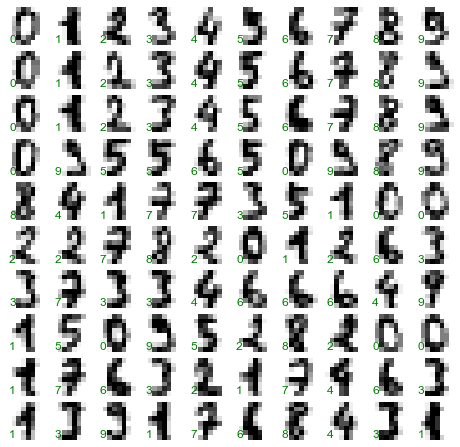

In [25]:
fig, axes = plt.subplots( 10, 10, figsize = (8,8),
                         subplot_kw = { 'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace =0.1, wspace= 0.2) )

for i, ax in enumerate(axes.flat):
    ax.imshow( digits.images[i], cmap = 'binary', interpolation = 'nearest' )
    ax.text( 0.05, 0.05, str(digits.target[i]), transform = ax.transAxes, color ='green')

Massage data for modelling

In [16]:
X = digits.data
Y = digits.target

#### Dimensionality reduction with manifold Isomap

In [17]:
from sklearn.manifold import Isomap

In [18]:
iso = Isomap( n_components=2 )

In [19]:
iso.fit( digits.data )

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

Project original data to two dimensions (Isomap components)

In [20]:
data_projected = iso.transform( digits.data )

In [21]:
data_projected.shape

(1797, 2)

#### Projection plot

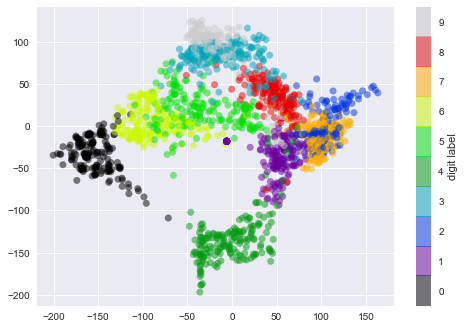

In [27]:
plt.scatter( data_projected[:,0], data_projected[:,1],
           c = digits.target, edgecolor = 'none', alpha =0.5,
           cmap = plt.cm.get_cmap( 'nipy_spectral' , 10 ))
plt.colorbar( label = 'digit label', ticks = range(10))
plt.clim( -0.5, 9.5 )

### Classification with Gaussian Naive Bayes

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [37]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, Y, test_size = 0.3 , random_state = 0)

Fitting the GNB model

In [38]:
model = GaussianNB()
model.fit( Xtrain, Ytrain )
y_model = model.predict( Xtest )

In [39]:
accuracy_score( Ytest, y_model)

0.82407407407407407

Let's plot a confussion matrix to see where we've got it wrong

In [40]:
from sklearn.metrics import confusion_matrix

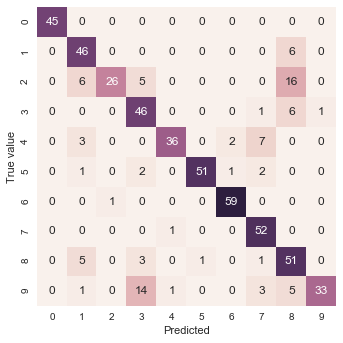

In [42]:
mat = confusion_matrix( Ytest, y_model )
sns.heatmap( mat, square= True, annot = True ,cbar= False)
plt.xlabel( 'Predicted' )
plt.ylabel( 'True value' )